### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

### Read all the file names

In [2]:
camera = glob.glob('Camera/*.jpg')
headphones = glob.glob('Headphones/*.jpg')
shoes = glob.glob('Shoes/*.jpg')
watch = glob.glob('Watch/*.jpg')

In [3]:
len(camera)

34

### Read image data from all files and store it in a variable, Store the label as well

In [4]:
images = []
labels = []

for i in camera:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in headphones:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in shoes:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in watch:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

### Store Label Value - name in Dictionary

In [5]:
label_names={1:'camera', 2:'headphones', 3:'shoes', 4:'watch'}

### Shuffle images list and labels

In [6]:
images, labels= shuffle(images, labels)

### View some of the images

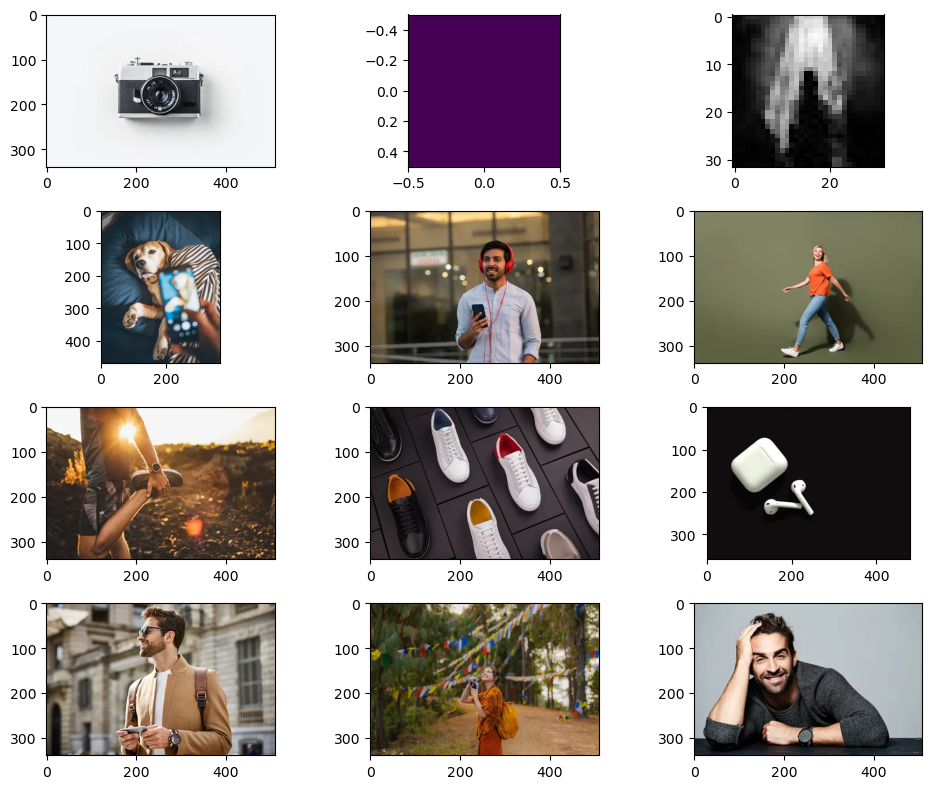

In [7]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i])
    
plt.tight_layout()

### Resize all images to same dimension

In [8]:
X = []

for i in images:
    X.append(resize(i, (400,400,3)))

### View images after resizing

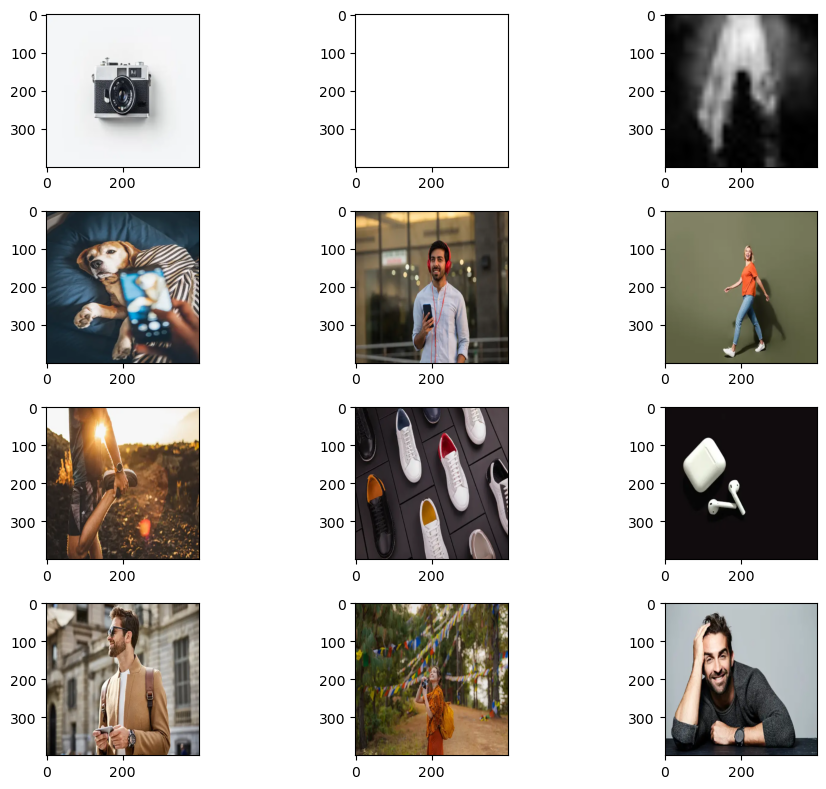

In [9]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(X[i])
    
plt.tight_layout()

### Convert image and array to numpy array and name it X and y respectively

In [10]:
X = np.array(X)
y = np.array(labels)

### Reshape the images to 1 dimension¶

In [11]:
d1, d2, d3, d4 = X.shape

In [12]:
X = X.reshape((d1, d2*d3*d4))

### Train test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Create SVM Model and train it

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC()

In [17]:
model.fit(X_train, y_train)

SVC()

### Make predictions with X_test

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0,
       2, 2, 0])

### Evaluate the Model

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
accuracy_score(y_test,y_pred)

0.16666666666666666

<Axes: >

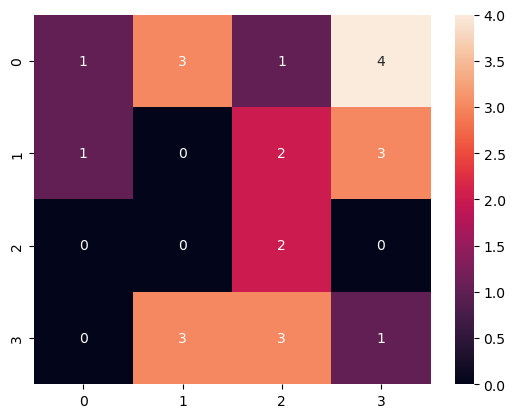

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.00      0.00      0.00         6
           2       0.25      1.00      0.40         2
           3       0.12      0.14      0.13         7

    accuracy                           0.17        24
   macro avg       0.22      0.31      0.18        24
weighted avg       0.24      0.17      0.14        24

